In [ ]:
import pandas as pd
import datetime as dt
import ast
import numpy as np
import math
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings(action='ignore')


In [ ]:
data_path = "data/"
m = pd.read_csv(data_path + "movies_postprocessing.csv").drop("Unnamed: 0", axis=1)
entities = {}
for col in ["genres", "keywords","plot_keywords","all_keywords" ,"production_companies", "production_countries", "spoken_languages"]:
    m[col] = pd.Series(ast.literal_eval(b) for b in m[col])

In [76]:
def expand_categorical(cat_var = "genres", filter_cat=None, top = None, by = "profit"):
    m_ = m
    if top is not None:
        m_ = success_analysis(measurement = by, top_no=top, start_y = 2000, end_y = 2019)
    m_expanded = m_[cat_var].apply(pd.Series).merge(m_,left_index=True, right_index=True).drop(cat_var, axis=1)
    m_expanded = m_expanded.melt(id_vars = [a for a in m_expanded.columns if a not in range(0,7)],value_name = cat_var)
    if filter_cat:
        m_expanded = m_expanded[m_expanded[cat_var].isin(filter_cat)]
    return m_expanded

def print_violinplots(col, filter_cat, target, filter_zero=False, t1 = None, t2 = None, scale = 1):
    if target in ["profit","budget"]: scale = 1000000
    if 'facebook' in target: scale = 1000
        
    if t1 == None: t1 = col.capitalize()
    if t2 == None: t2 = target.capitalize()
    
    exponent = int(math.log10(scale))
    scale = 10 ** exponent
    suffix = ""
    if scale == 1000000:
        suffix = "M"
    if scale == 1000:
        suffix = "K"

    num_cat = len(filter_cat)
    m_expanded = expand_categorical(col, filter_cat = filter_cat)
    if filter_zero:
        m_expanded = m_expanded[m_expanded[target] > 0]
    m_expanded["NUM"] = m_expanded[col].map(m_expanded.groupby(by=[col])[target].count())
    m_expanded["NUM"] = m_expanded["NUM"].apply(lambda x: "{0:>5}".format(x))
    m_expanded["medians"] = m_expanded[col].map(m_expanded.groupby(by=[col])[target].median())
    m_expanded["medians"] = m_expanded["medians"].apply(lambda x: "{0:6.2f}".format(x/scale)+suffix)
    m_expanded[col] = m_expanded[col] +" " +m_expanded["NUM"] +" "+ m_expanded["medians"]
    my_order = m_expanded.groupby(by=[col])[target].median().sort_values(ascending=False).index
    f, axs = plt.subplots(figsize=(8, num_cat / 3))
    axs = sns.violinplot(y=m_expanded[col], x=m_expanded[target], cut=1e9, order = my_order) \
                .set_title("Impact of {} on {}".format(t1, t2))
    
    
    
#Get most common keywords
def get_most_common_with_counts(key, count, df = m):
    most_common_keywords = sorted(Counter([a for b in df[key] for a in b]).items(), key = lambda kv: kv[1], reverse=True)
    return most_common_keywords[:count]
    

def get_most_common(key, count, df = m):
    most_common_keywords = sorted(Counter([a for b in df[key] for a in b]).items(), key = lambda kv: kv[1], reverse=True)
    most_common_keywords = most_common_keywords[:count]
    most_common_keywords = [a for a,b in most_common_keywords]
    return most_common_keywords


def print_content_rating_violinplot(target = 'profit', cut = 2, filter_zero=True):
    col, target = 'content_rating', target
    my_order = m.groupby(by=[col])[target].median().sort_values(ascending=False).index
    m_ = m
    if filter_zero:
        m_ = m_[ (m_[target] > 0) & (m_[target] is not None)]
    f, axs = plt.subplots(figsize=(6, 3))
    sns.violinplot(y=col, x=target, data=m_, order=my_order, cut = cut)

# Impact of Genre

## Impact of Genre on Financial Measures

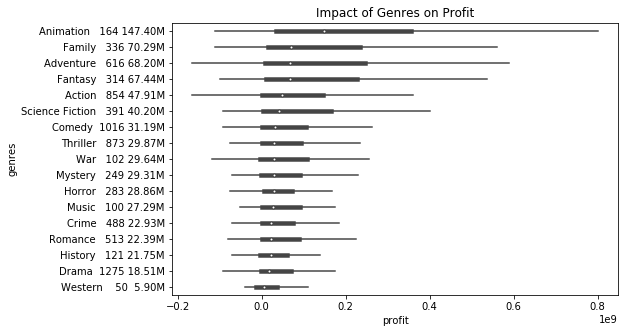

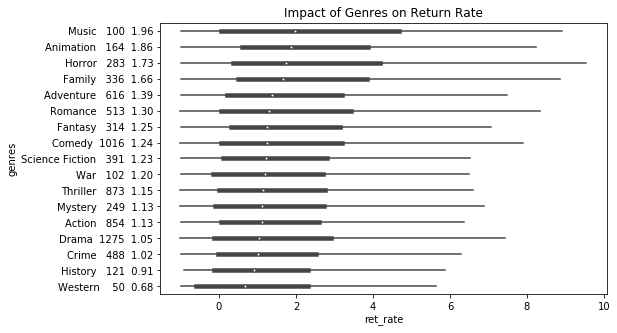

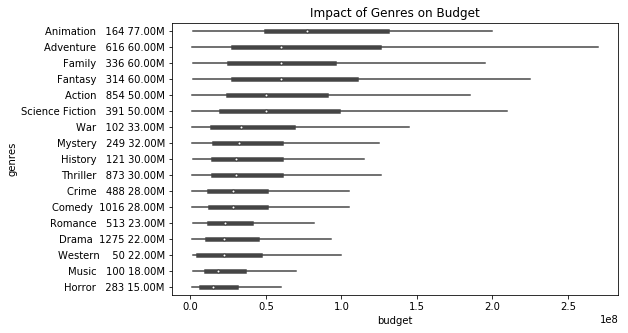

In [52]:
print_violinplots("genres", get_most_common("genres", 20), "profit")
print_violinplots("genres", get_most_common("genres", 20), "ret_rate", t1= "Genres", t2="Return Rate")
print_violinplots("genres", get_most_common("genres", 20), "budget")

## Impact of Genre on Popularity Measures

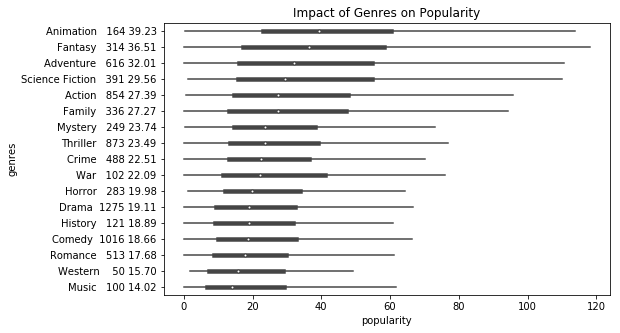

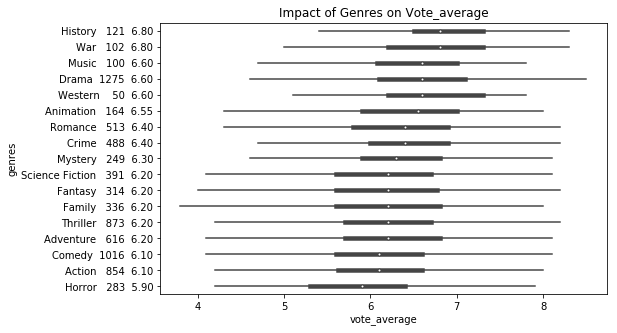

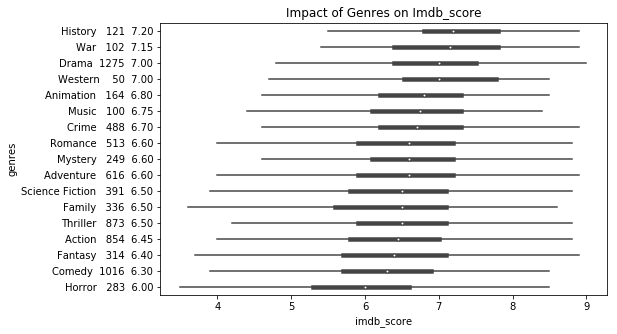

In [53]:
print_violinplots("genres", get_most_common("genres", 20), "popularity")
print_violinplots("genres", get_most_common("genres", 20), "vote_average")
print_violinplots("genres", get_most_common("genres", 20), "imdb_score")

## Impact of Genre on Facebook Likes

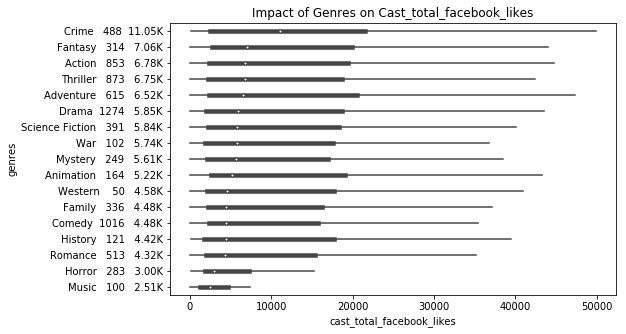

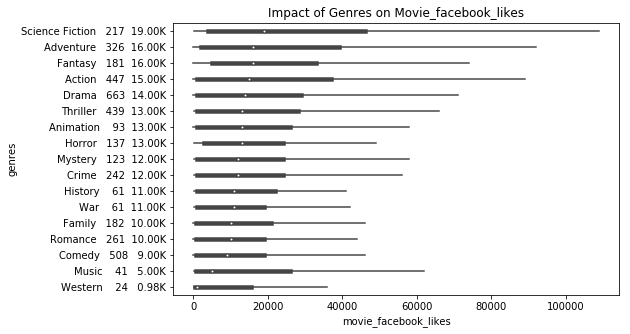

In [77]:
print_violinplots("genres", get_most_common("genres", 20), "cast_total_facebook_likes", filter_zero=True)
print_violinplots("genres", get_most_common("genres", 20), "movie_facebook_likes", filter_zero=True)

## Impact of Genre on Other

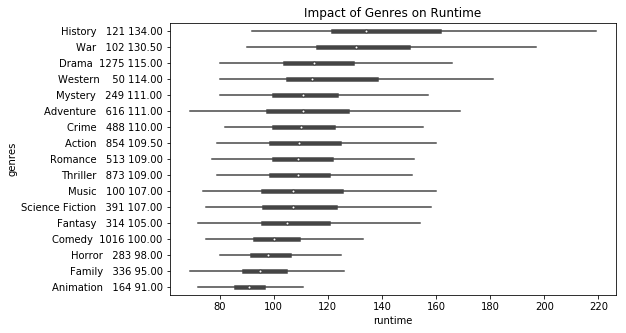

In [55]:
print_violinplots("genres", get_most_common("genres", 20), "runtime", filter_zero=True)

# Impact of Keywords

## Impact of Keywords on Financial Measures

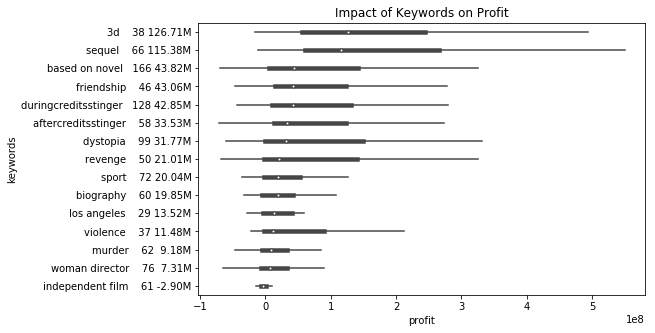

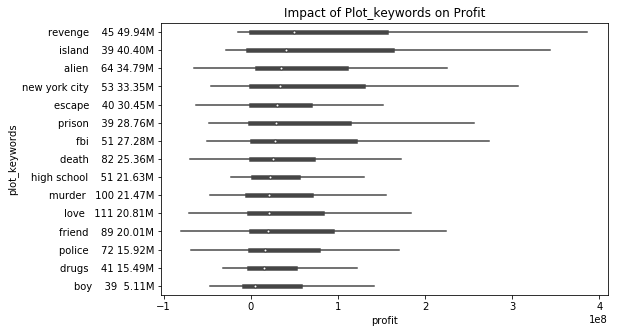

In [56]:
print_violinplots("keywords", get_most_common("keywords", 15), "profit")
print_violinplots("plot_keywords", get_most_common("plot_keywords", 15), "profit")

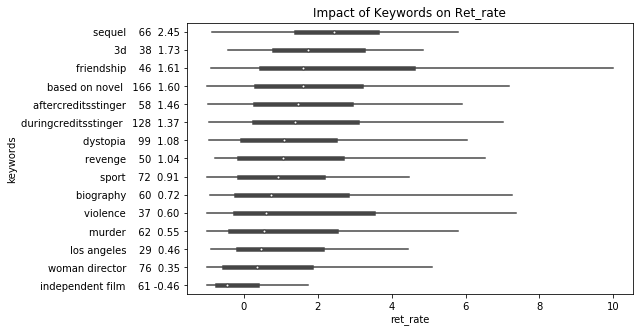

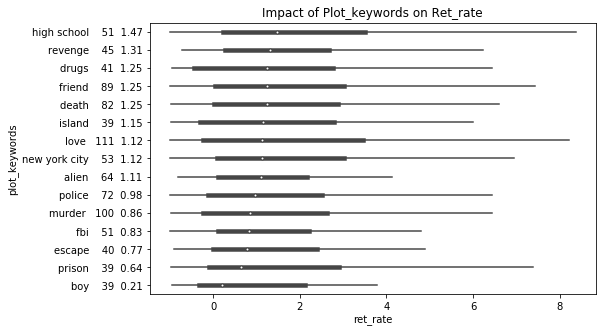

In [57]:
print_violinplots("keywords", get_most_common("keywords", 15), "ret_rate")
print_violinplots("plot_keywords", get_most_common("plot_keywords", 15), "ret_rate")

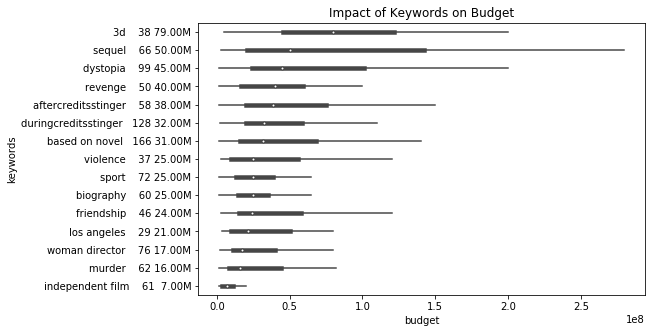

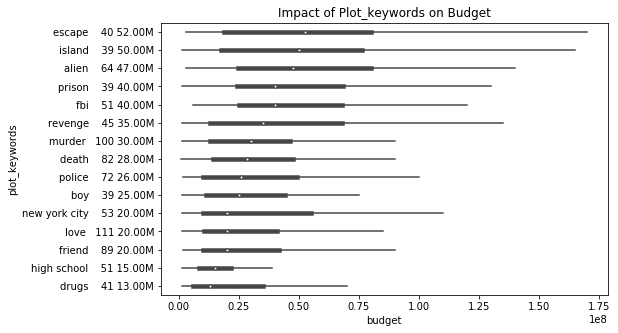

In [58]:
print_violinplots("keywords", get_most_common("keywords", 15), "budget")
print_violinplots("plot_keywords", get_most_common("plot_keywords", 15), "budget")

## Impact of Keywords on Popularity Measures

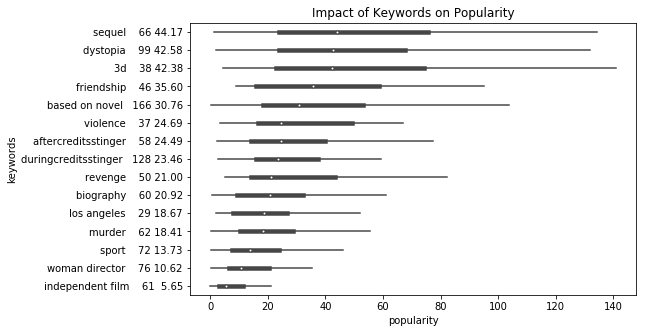

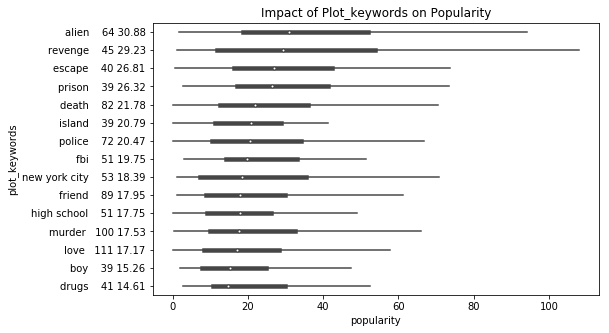

In [59]:
print_violinplots("keywords", get_most_common("keywords", 15), "popularity")
print_violinplots("plot_keywords", get_most_common("plot_keywords", 15), "popularity")

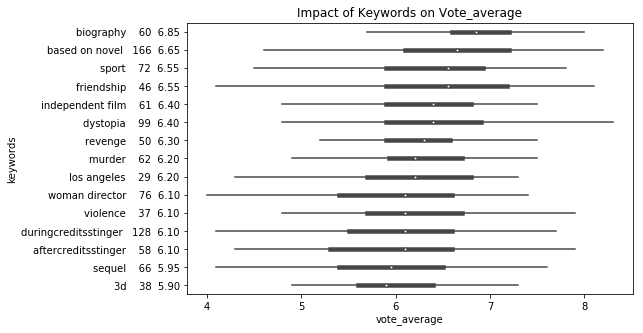

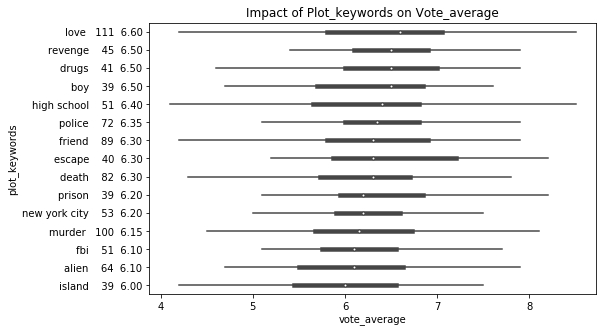

In [60]:
print_violinplots("keywords", get_most_common("keywords", 15), "vote_average")
print_violinplots("plot_keywords", get_most_common("plot_keywords", 15), "vote_average")

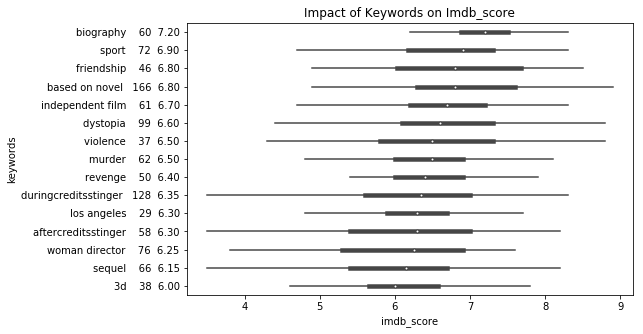

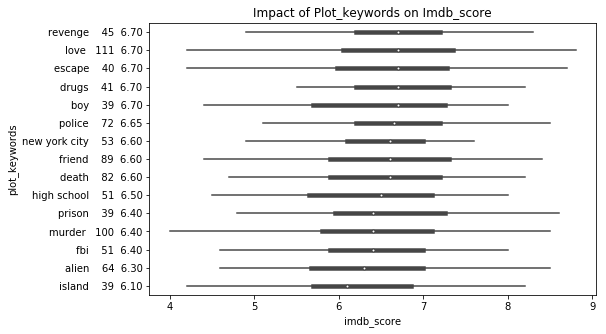

In [61]:
print_violinplots("keywords", get_most_common("keywords", 15), "imdb_score")
print_violinplots("plot_keywords", get_most_common("plot_keywords", 15), "imdb_score")

## Impact of Keywords on Facebook Likes

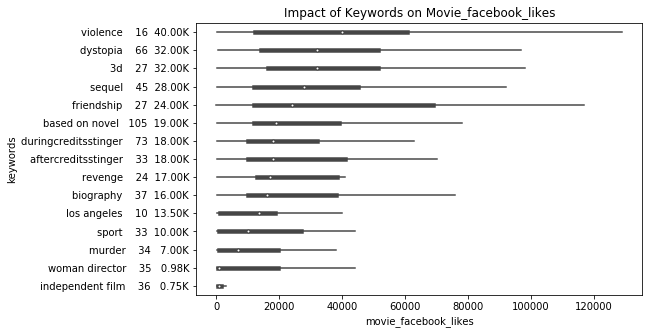

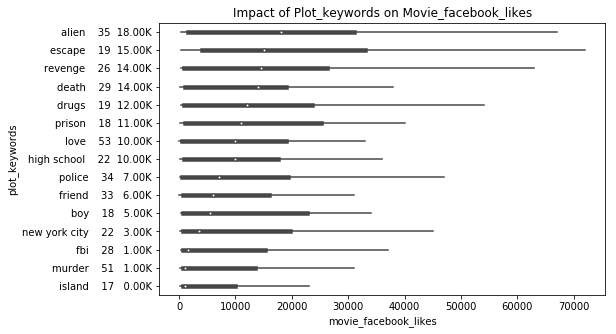

In [78]:
print_violinplots("keywords", get_most_common("keywords", 15), "movie_facebook_likes", filter_zero=True)
print_violinplots("plot_keywords", get_most_common("plot_keywords", 15), "movie_facebook_likes", filter_zero=True)

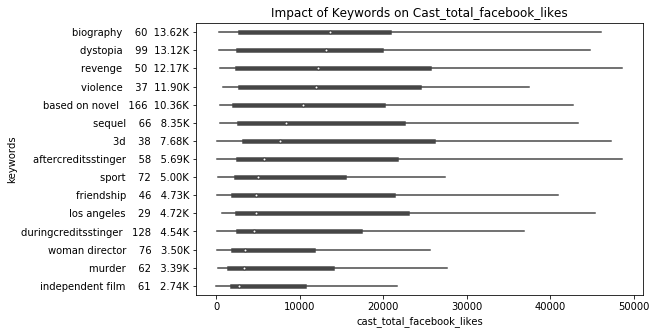

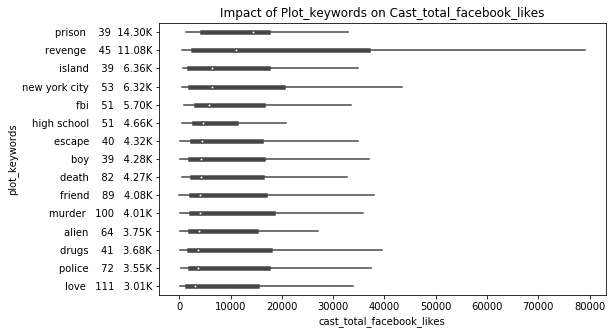

In [79]:
print_violinplots("keywords", get_most_common("keywords", 15), "cast_total_facebook_likes", filter_zero=True)
print_violinplots("plot_keywords", get_most_common("plot_keywords", 15), "cast_total_facebook_likes", filter_zero=True)

### Impact of Keywords on Other

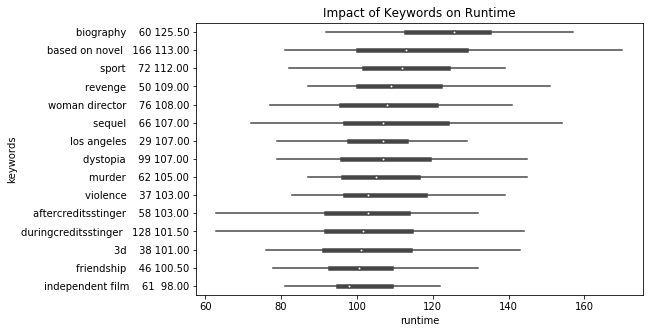

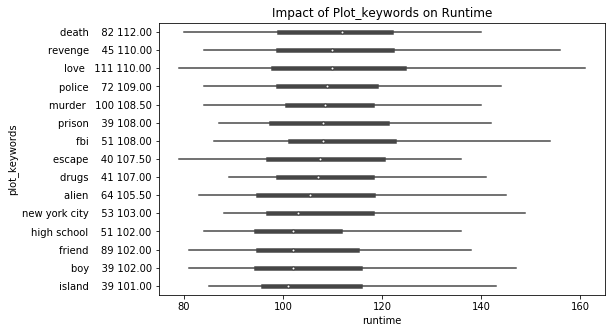

In [75]:
print_violinplots("keywords", get_most_common("keywords", 15), "runtime", filter_zero=True)
print_violinplots("plot_keywords", get_most_common("plot_keywords", 15), "runtime", filter_zero=True)

# Content Rating 

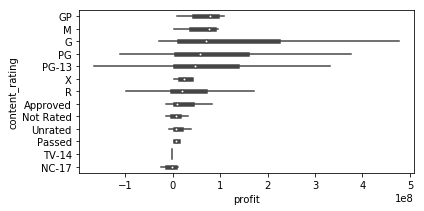

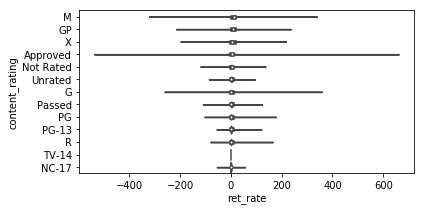

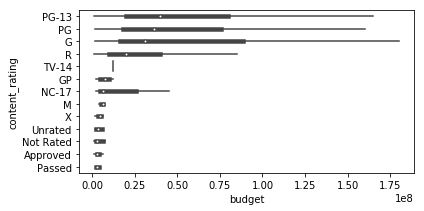

In [66]:
print_content_rating_violinplot('profit', cut = 0.5e9, filter_zero=False)
print_content_rating_violinplot('ret_rate', cut = 50, filter_zero=False)
print_content_rating_violinplot('budget', cut = 1e8)

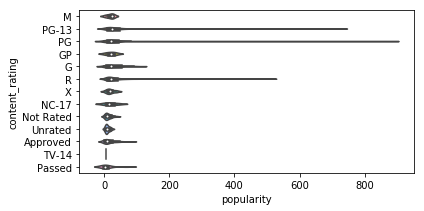

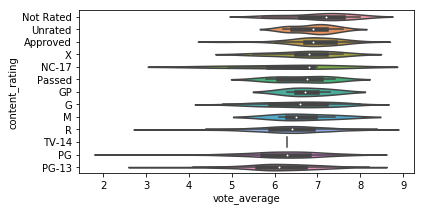

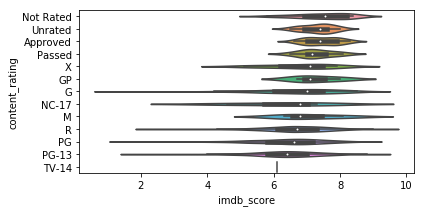

In [67]:
print_content_rating_violinplot('popularity')
print_content_rating_violinplot('vote_average')
print_content_rating_violinplot('imdb_score')

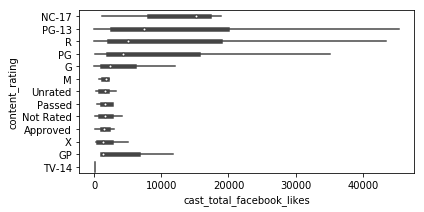

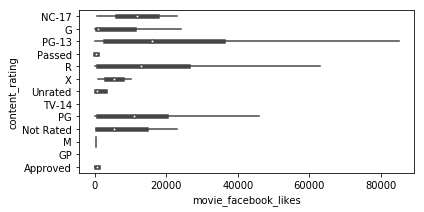

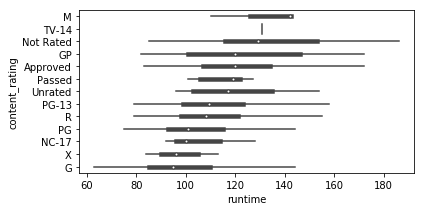

In [68]:
print_content_rating_violinplot('cast_total_facebook_likes', cut= 20000)
print_content_rating_violinplot('movie_facebook_likes', cut = 10000)
print_content_rating_violinplot('runtime', cut = 10000)

# Production Companies

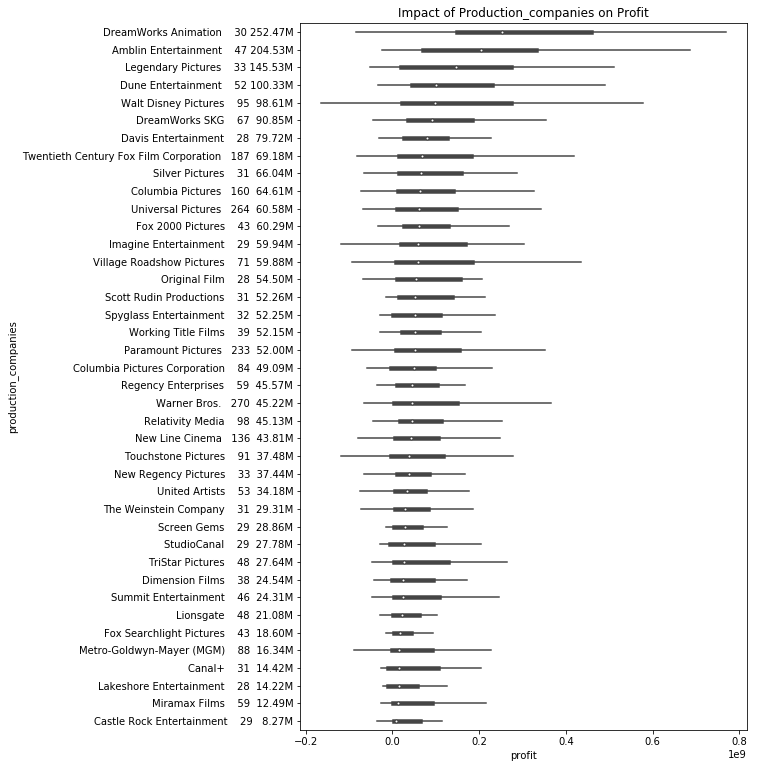

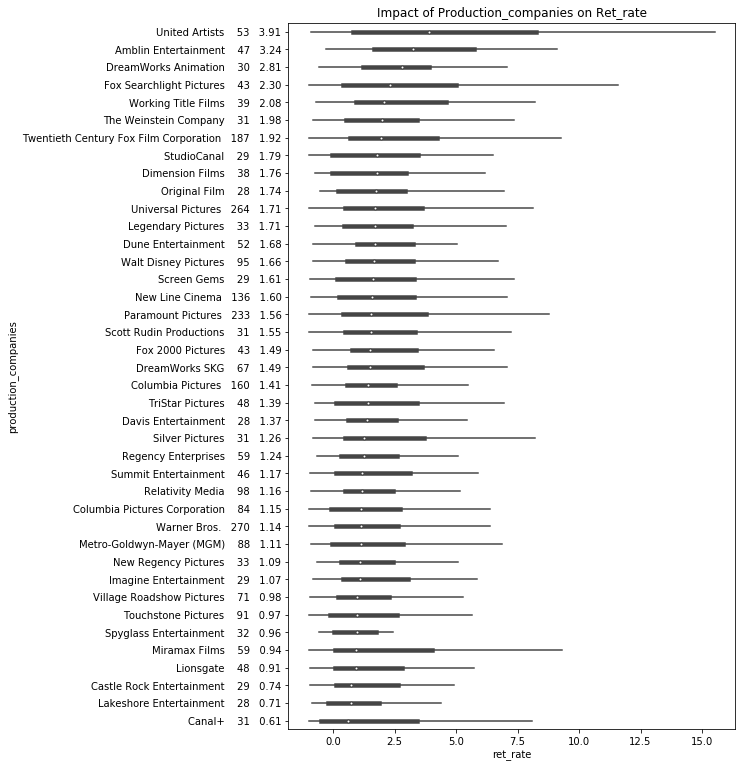

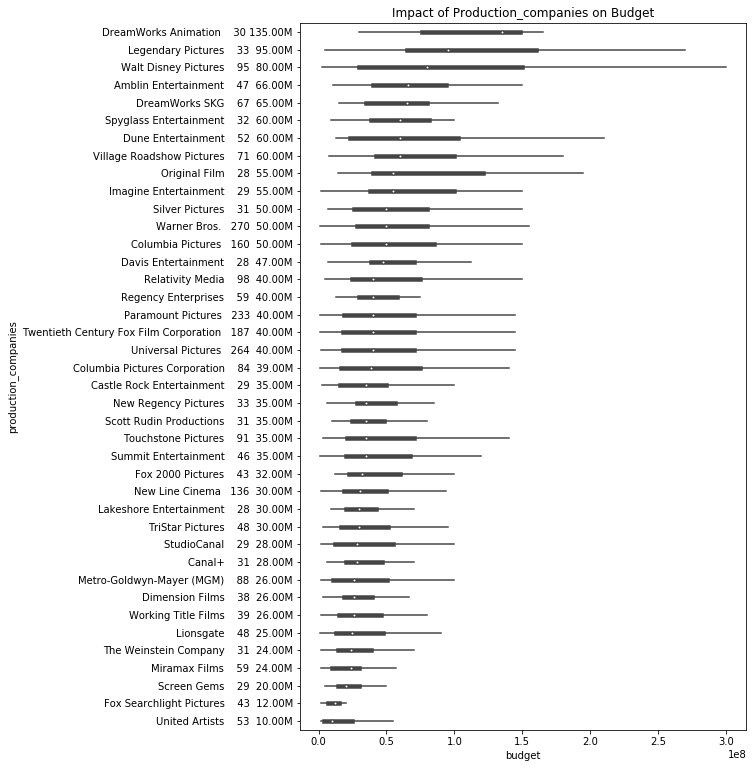

In [80]:
print_violinplots("production_companies", get_most_common("production_companies", 40), "profit")
print_violinplots("production_companies", get_most_common("production_companies", 40), "ret_rate")
print_violinplots("production_companies", get_most_common("production_companies", 40), "budget")

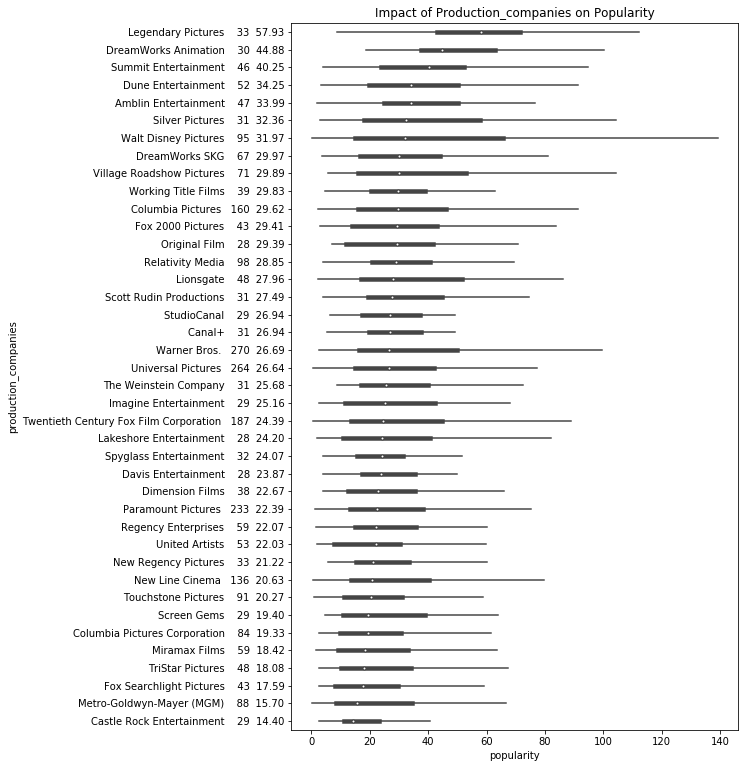

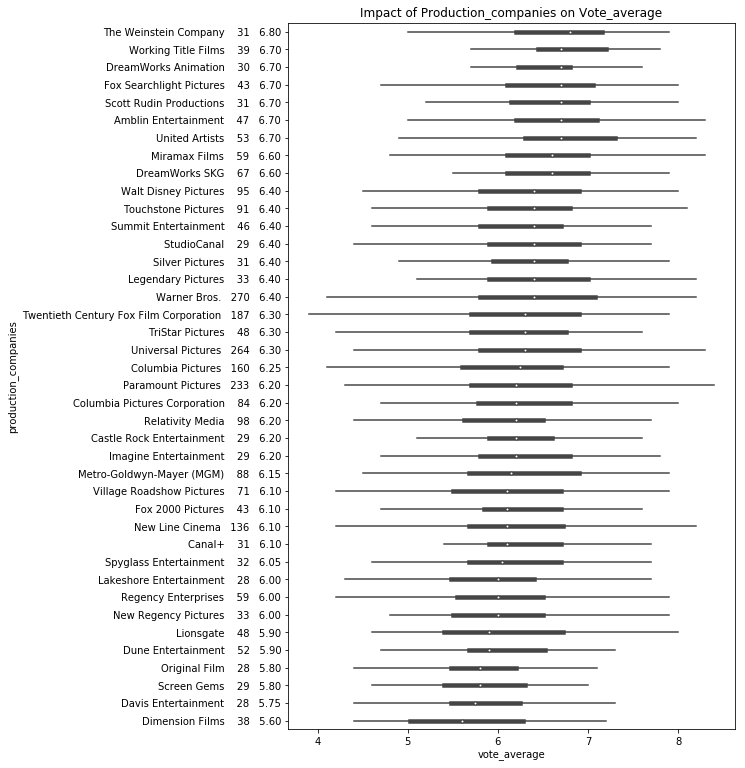

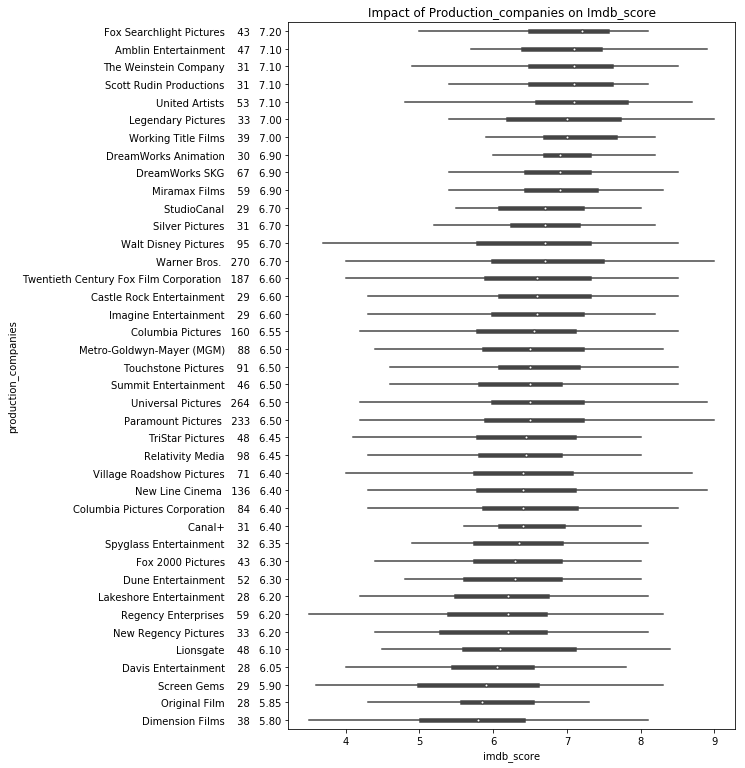

In [81]:
print_violinplots("production_companies", get_most_common("production_companies", 40), "popularity")
print_violinplots("production_companies", get_most_common("production_companies", 40), "vote_average")
print_violinplots("production_companies", get_most_common("production_companies", 40), "imdb_score")

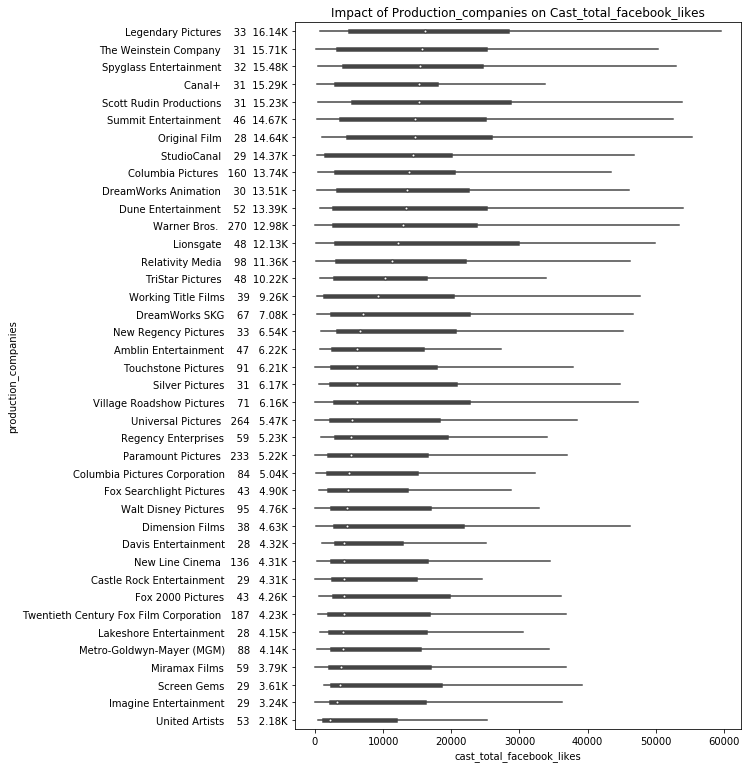

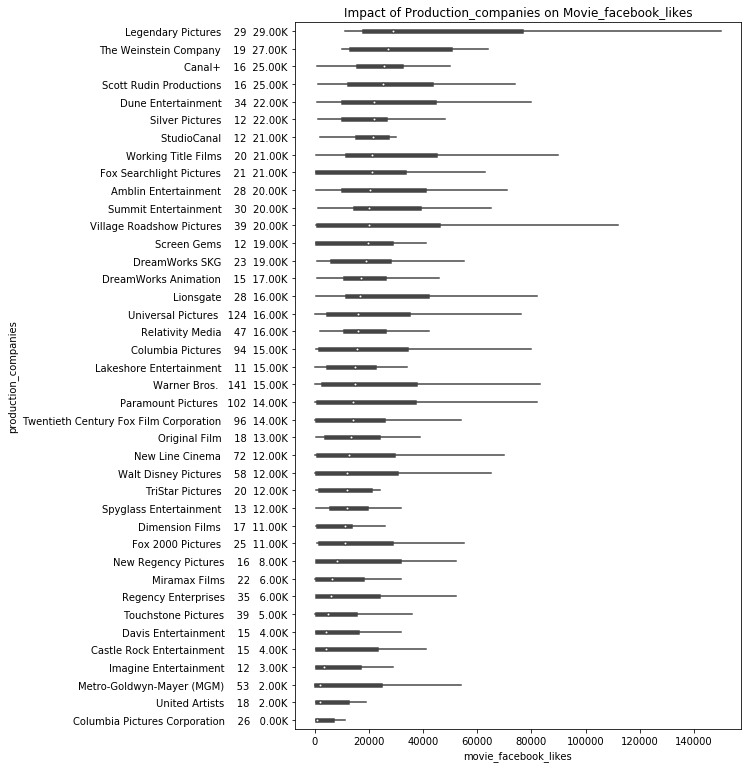

In [82]:
print_violinplots("production_companies", get_most_common("production_companies", 40), "cast_total_facebook_likes" , filter_zero=True)
print_violinplots("production_companies", get_most_common("production_companies", 40), "movie_facebook_likes", filter_zero=True)